<a href="https://colab.research.google.com/github/paascorb/TrabajoAAI/blob/main/TrabajoAAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Aprendizaje Automático I

En estre trabajo se va a intentar pasar por todos los contenidos vistos en la asignatura referente al apartado de aprendizaje no supervisado. Los datos utilizados han sido proporcionados por Vicente Marco del Departamento de Agricultura y Alimentación.

En estos datos encontramos, para una serie de biomas o habitats, cuántos insectos y arañas han sido encontrados. Estos animales están diferenciados por su orden.
Como son datos de un proyecto real, y en principio no han sido tratados, parece interesante ver si son datos interesantes para la naturaleza de este trabajo y si se puede hacer clustering con ellos.

## Tratamiento de datos

Este apartado no toca los temas más importantes de la asignatura, pero es necesario hacerlo y parece interesante realizarlo por mayor completitud.

Primero importamos todos los CSV, en este caso hay 20, 10 para cada tipo de trampa (Combi o Pitfall), y en cada trampa 10 semanas. En este caso diferenciar por trampas o semanas parece agregar complejidad, así que vamos a aunar todo en un solo dataset.

In [ ]:
import pandas as pd
import numpy as np
from functools import reduce

#Combi:
df = []
for i in range(1, 11):
  df.append(pd.read_csv('Combi_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1 , 1:].iloc[:, :-1])
#Pitfall:
for i in range(1, 11):
  df.append(pd.read_csv('Pitfal_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1 , 1:].iloc[:, :-1])
df = reduce(lambda a, b: a.add(b, fill_value=0), df)
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,5.0,1.0,4.0,2.0,5.0,3.0,4.0,2.0,2.0,0.0,...,3.0,1.0,3.0,2.0,2.0,7.0,1.0,2.0,3.0,2.0
1,2.0,6.0,2.0,3.0,0.0,6.0,8.0,2.0,5.0,3.0,...,2.0,2.0,1.0,4.0,5.0,4.0,2.0,2.0,1.0,4.0
2,4.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,...,2.0,1.0,1.0,0.0,0.0,4.0,4.0,6.0,0.0,1.0
3,5.0,10.0,4.0,0.0,13.0,34.0,148.0,15.0,7.0,1.0,...,4.0,6.0,6.0,3.0,3.0,2.0,0.0,4.0,0.0,2.0
4,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


Ya tenemos nuestro dataset. Las 25 columnas representan los habitats de la siguiente manera:
 - 1-5: Olivo
 - 6-10: Pradera
 - 11-15: Viñedo
 - 16-20: Maquia Mediterránea
 - 21-25: Bosque Mediterráneo

In [ ]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,...,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,5.458182,5.841818,4.229091,3.916364,2.930909,3.445455,3.900000,4.201818,6.043636,11.856364,...,5.574545,4.627273,4.480000,2.789091,3.610909,10.290909,8.400000,12.485455,4.145455,3.269091
std,22.413750,21.463708,16.630624,13.564805,9.352573,11.110790,12.892543,14.027075,21.201134,172.301562,...,23.848965,17.413465,19.302655,11.761870,17.804685,159.110171,50.241928,90.674696,17.207846,13.427548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,315.000000,235.000000,149.000000,133.000000,87.000000,118.000000,148.000000,174.000000,279.000000,4028.000000,...,418.000000,204.000000,222.000000,154.000000,334.000000,3716.000000,890.000000,1496.000000,230.000000,203.000000


Podemos comprobar, gracias a estos estadísticos, que hay muchisíma dispersión en general. Y que las diferencias entre media y mediana son enormes. Eso es que que casi todos los datos están a cero. Pero eso ya lo sabiamos porque es una matriz con muchos huecos.

Vamos a ver relaciones entre columnas:

In [ ]:
import numpy as np

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
1,1.000000,0.860128,0.845022,0.711330,0.660864,0.759668,0.547621,0.594224,0.573598,0.638716,0.687054,0.705977,0.775910,0.758064,0.737655,0.541919,0.658270,0.580376,0.685746,0.875068,0.138133,0.519637,0.327214,0.583047,0.660979
2,0.860128,1.000000,0.855827,0.813396,0.724284,0.848355,0.655352,0.632047,0.567088,0.291372,0.694207,0.758759,0.763734,0.792025,0.745392,0.539715,0.690889,0.714024,0.728528,0.605993,0.088298,0.386820,0.282345,0.595629,0.747358
3,0.845022,0.855827,1.000000,0.760080,0.729219,0.849020,0.590669,0.587667,0.532665,0.359609,0.796936,0.821336,0.740949,0.813943,0.714503,0.492214,0.663563,0.649394,0.674520,0.640057,0.053141,0.379355,0.391605,0.588600,0.699989
4,0.711330,0.813396,0.760080,1.000000,0.719128,0.825877,0.596556,0.588731,0.550750,0.097946,0.785652,0.780873,0.710897,0.798145,0.807525,0.578454,0.742692,0.680767,0.727984,0.486905,0.130136,0.354832,0.325334,0.600100,0.752174
5,0.660864,0.724284,0.729219,0.719128,1.000000,0.712543,0.593650,0.585032,0.501336,0.134487,0.664340,0.656914,0.698679,0.764444,0.699164,0.543574,0.665356,0.557500,0.681530,0.467759,0.173271,0.398899,0.356176,0.585815,0.664015
6,0.759668,0.848355,0.849020,0.825877,0.712543,1.000000,0.693120,0.633332,0.548133,0.185644,0.775221,0.776829,0.739060,0.802548,0.762203,0.590896,0.746790,0.709516,0.757647,0.542895,0.130089,0.394751,0.362054,0.654175,0.782120
7,0.547621,0.655352,0.590669,0.596556,0.593650,0.693120,1.000000,0.539757,0.435197,0.088509,0.540540,0.551700,0.533289,0.611070,0.569223,0.544922,0.618157,0.560123,0.573334,0.390660,0.249918,0.394887,0.330975,0.554380,0.598639
8,0.594224,0.632047,0.587667,0.588731,0.585032,0.633332,0.539757,1.000000,0.842020,0.184948,0.559113,0.600151,0.661647,0.697010,0.669892,0.593105,0.670531,0.556975,0.707185,0.501316,0.239628,0.453489,0.363776,0.617799,0.678507
9,0.573598,0.567088,0.532665,0.550750,0.501336,0.548133,0.435197,0.842020,1.000000,0.260198,0.541153,0.613092,0.652658,0.594708,0.631808,0.525322,0.621444,0.473738,0.585100,0.508885,0.222820,0.397819,0.256599,0.531828,0.607724
10,0.638716,0.291372,0.359609,0.097946,0.134487,0.185644,0.088509,0.184948,0.260198,1.000000,0.141597,0.173637,0.379524,0.185254,0.180417,0.077487,0.093893,0.080018,0.103289,0.825707,0.023859,0.332990,0.170454,0.106557,0.081463


Vemos que algunos habitats coinciden con sus cinco filas en la correlación, pero otros parecen no tener ningúna relación. Quizá con más datos se verían esos bloques de 5 en 5 en la diagonal.

Quizá para simplificar más, podemos agrupar los distintos habitats, y de esta forma tener solo 5 columnas:

In [ ]:
df['01'] = df['1'] + df['2'] + df['3']+ df['4'] + df['5']
df['02'] = df['6'] + df['7'] + df['8']+ df['9'] + df['10']
df['03'] = df['11'] + df['12'] + df['13']+ df['14'] + df['15']
df['04'] = df['16'] + df['17'] + df['18']+ df['19'] + df['20']
df['05'] = df['21'] + df['22'] + df['23']+ df['24'] + df['25']
df = df.iloc[: , 25:]
df

,01,02,03,04,05
0,17.0,11.0,15.0,11.0,15.0
1,13.0,24.0,18.0,14.0,13.0
2,8.0,7.0,6.0,4.0,15.0
3,32.0,205.0,24.0,22.0,8.0
4,4.0,3.0,2.0,5.0,0.0
...,...,...,...,...,...
545,20.0,35.0,71.0,17.0,5.0
546,2.0,0.0,8.0,14.0,1.0
547,2.0,1.0,9.0,0.0,0.0
548,0.0,1.0,0.0,0.0,0.0


Veamos ahora las correlaciones:

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,01,02,03,04,05
01,1.000000,0.558621,0.894738,0.824740,0.341004
02,0.558621,1.000000,0.428257,0.464688,0.237034
03,0.894738,0.428257,1.000000,0.830153,0.353216
04,0.824740,0.464688,0.830153,1.000000,0.703101
05,0.341004,0.237034,0.353216,0.703101,1.000000


## Tendencia de clustering

Primero, para ver si tiene sentido hacer clústering vamos evaluarlo con el estadístico de Hopkins y el método VAT.

In [ ]:
pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyclustertend import hopkins, vat

hopkins(df,550)

0.017362783205175515

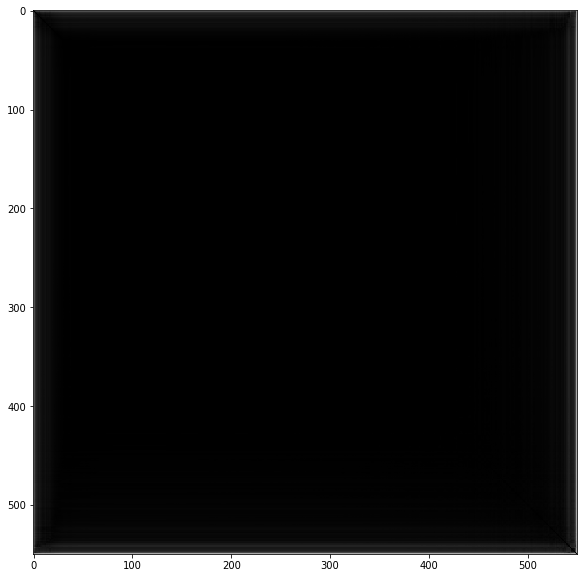

In [ ]:
vat(df)

Vamos a visualizar el Olivo y la padrera:

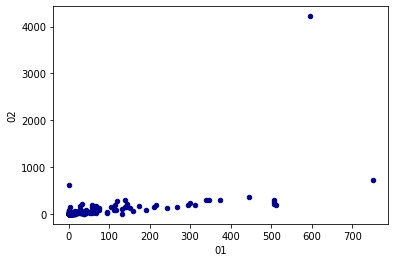

In [ ]:
 df.plot.scatter(x='01', y='02', c='DarkBlue')

Realmente no parecería interesante hacer clustering con estos datos. No tiene pinta que podamos diferenciar cada fila (un tipo de insecto o araña) con el número de veces que se encontró en un habitat dentro de grupos diferenciados.

Pero aún así vamos a continuar un poco para ver qué nos dicen los métodos.

## KMeans:

Como son 24 grupos de insectos distintos vamos a poner inicialmente k = 24.

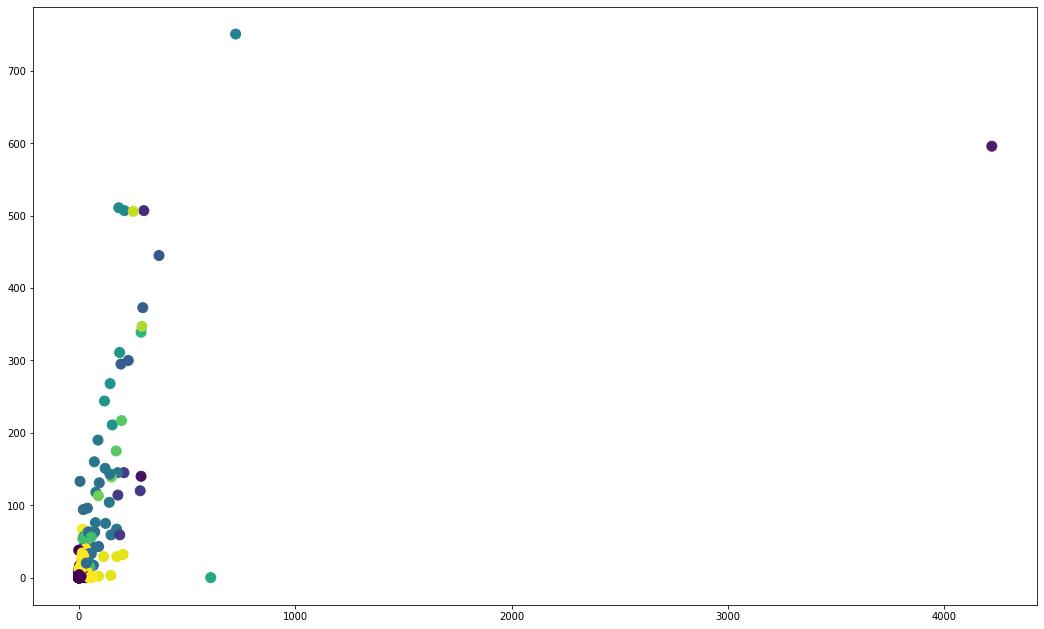

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Con esto no podemos scar ninguna conclusión, veamos si proyectamos a 2 dimensiones:

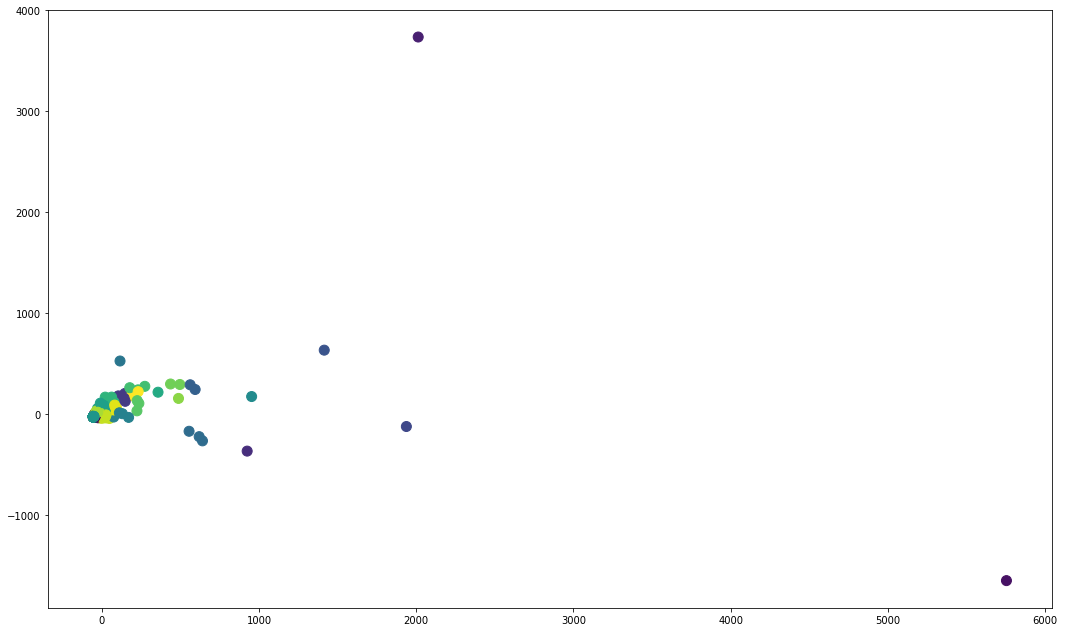

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)

df_pca = pd.DataFrame()

df_pca['1'] = pca_result[:,0]
df_pca['2'] = pca_result[:,1]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca['1'], df_pca['2'], c=kmeans.labels_, s=100)
plt.show()

Podemos ver también que hay una serie de datos "extremos" que hacen que el resto se distorsione un poco. Vamos a ver que pasa si eliminamos estos datos:

In [ ]:
df_pca.describe()

,1,2
count,5.500000e+02,5.500000e+02
mean,-1.653627e-15,-2.893847e-15
std,2.989388e+02,1.862752e+02
min,-5.330941e+01,-1.644596e+03
25%,-5.266950e+01,-2.295605e+01
50%,-5.061300e+01,-2.104787e+01
75%,-3.874073e+01,-1.455382e+01
max,5.753168e+03,3.735764e+03


Con esto y el grafico anterior vemos que todos los que tengan en la primera componente más de 900 son demasiado extremos, vamos a eliminarlos.

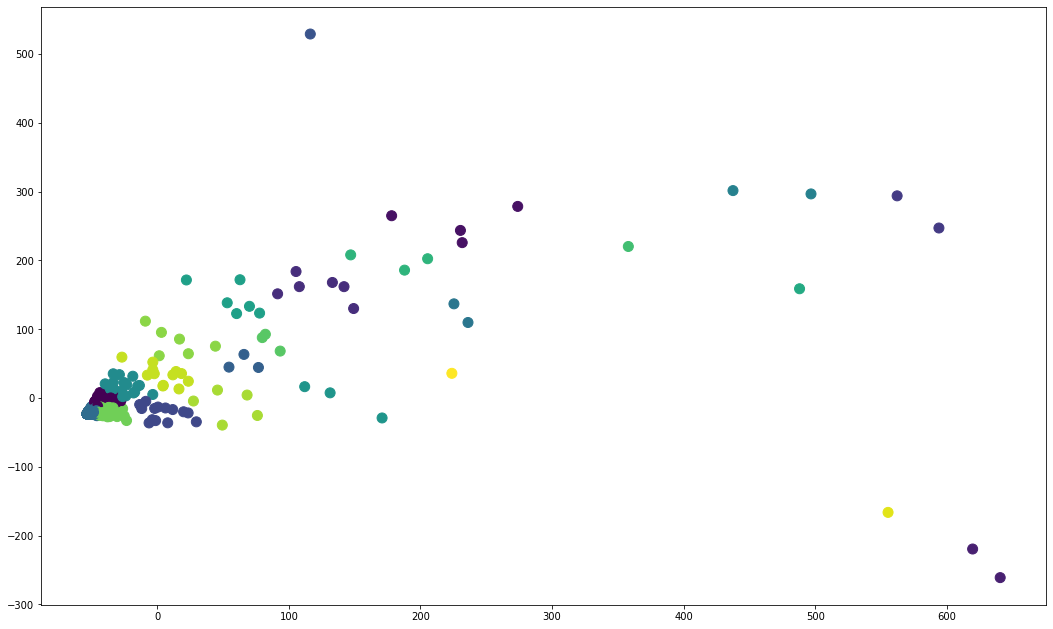

In [ ]:
df_pca2 = df_pca.loc[df_pca['1'] <= 900]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca2)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca2['1'], df_pca2['2'], c=kmeans.labels_, s=100)
plt.show()

Ahora podemos verlo mejor, pero sigen estando muy dispersos. Reduzcamos a 0.

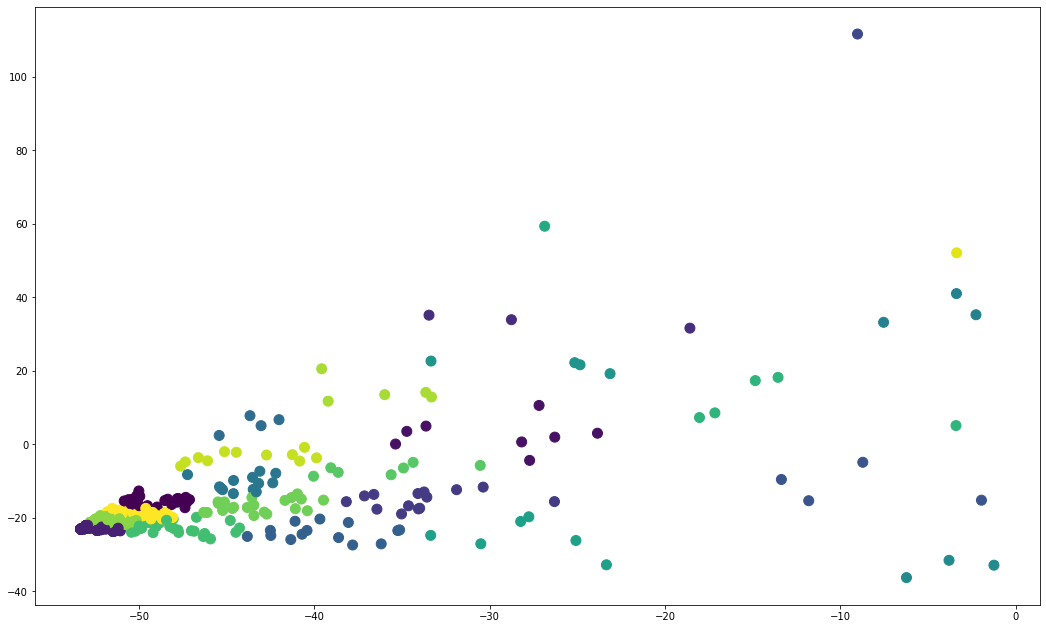

In [ ]:
df_pca3 = df_pca.loc[df_pca['1'] <= 0]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca3)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca3['1'], df_pca3['2'], c=kmeans.labels_, s=100)
plt.show()

Va cogiendo forma, pero aún así, siguen con cierta dispersión. Reduzcamos a -50.

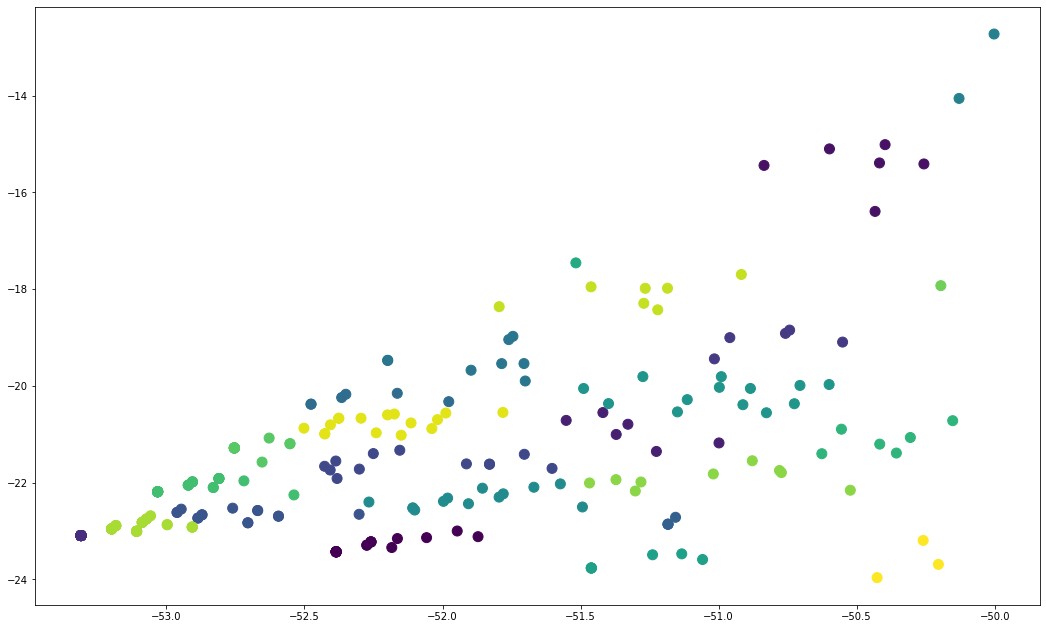

In [ ]:
df_pca4 = df_pca.loc[df_pca['1'] <= -50]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca4)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca4['1'], df_pca4['2'], c=kmeans.labels_, s=100)
plt.show()

Realmente no parece que estos grupos sean muy significativos. Pero recordemos que hemos proyectado y eliminado todos los que estaban por encima de -50.

Volviendo a nuestro dataset, aunque nos sea muy complicado visualizarlo o comprobar si tenemos buenos resultados, vamos a aplicar los críterios internos para comprobar esto último. Pero antes apliquemos el método del codo para comprobar el k óptimo.

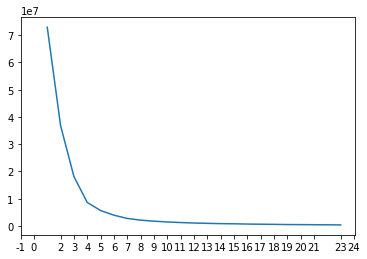

In [ ]:
inercias = []
for i in range(1, 24):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,24), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 24, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

Segun lo que vemos aquí es mejor hacer 4 grupos, vamos a ver los resultados anteriores con este valor.

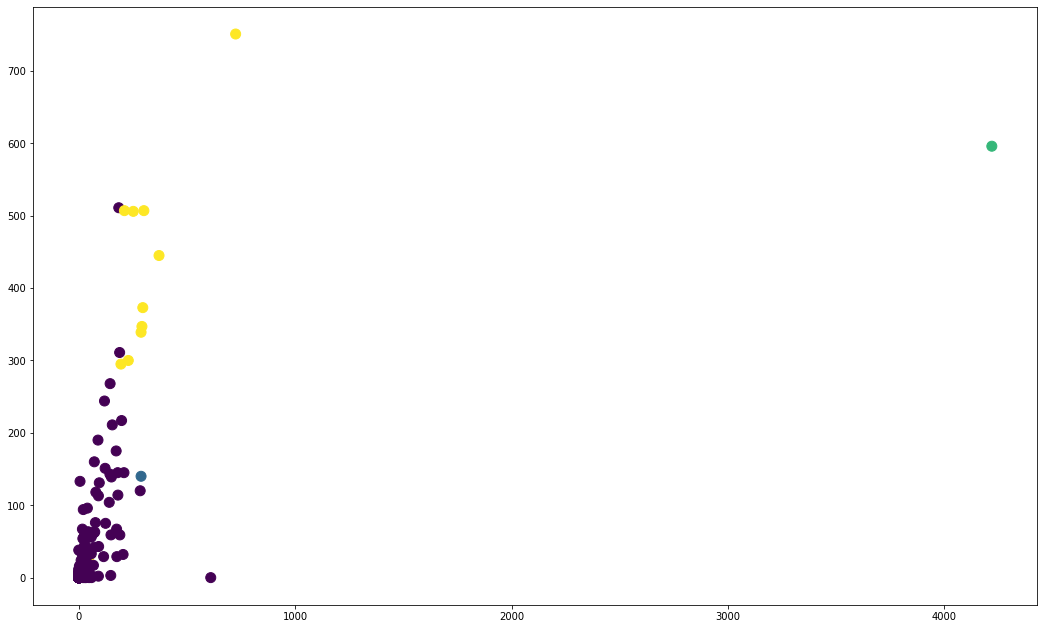

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Parece que encuentra dos grandes grupos y dos espurios. Veamos quienes son esos dos espurios y los eliminamos, así tendríamos 2 grupos diferenciados, que tiene sentido, porque podrían ser las arañas y los insectos.

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
aux1 = kmeans.labels_ == 0
aux2 = kmeans.labels_ == 3
df = df[aux1 | aux2]
df.reset_index(inplace=True, drop=True)
df

,01,02,03,04,05
0,17.0,11.0,15.0,11.0,15.0
1,13.0,24.0,18.0,14.0,13.0
2,8.0,7.0,6.0,4.0,15.0
3,32.0,205.0,24.0,22.0,8.0
4,4.0,3.0,2.0,5.0,0.0
...,...,...,...,...,...
543,20.0,35.0,71.0,17.0,5.0
544,2.0,0.0,8.0,14.0,1.0
545,2.0,1.0,9.0,0.0,0.0
546,0.0,1.0,0.0,0.0,0.0


Volvemos a aplicar el método del codo:

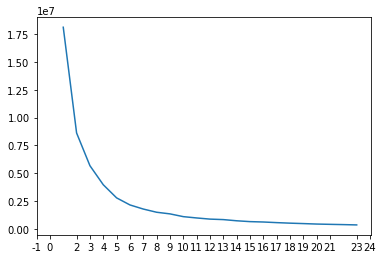

In [ ]:
inercias = []
for i in range(1, 24):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,24), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 24, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

Efectivamente ahora nos indica k=2.

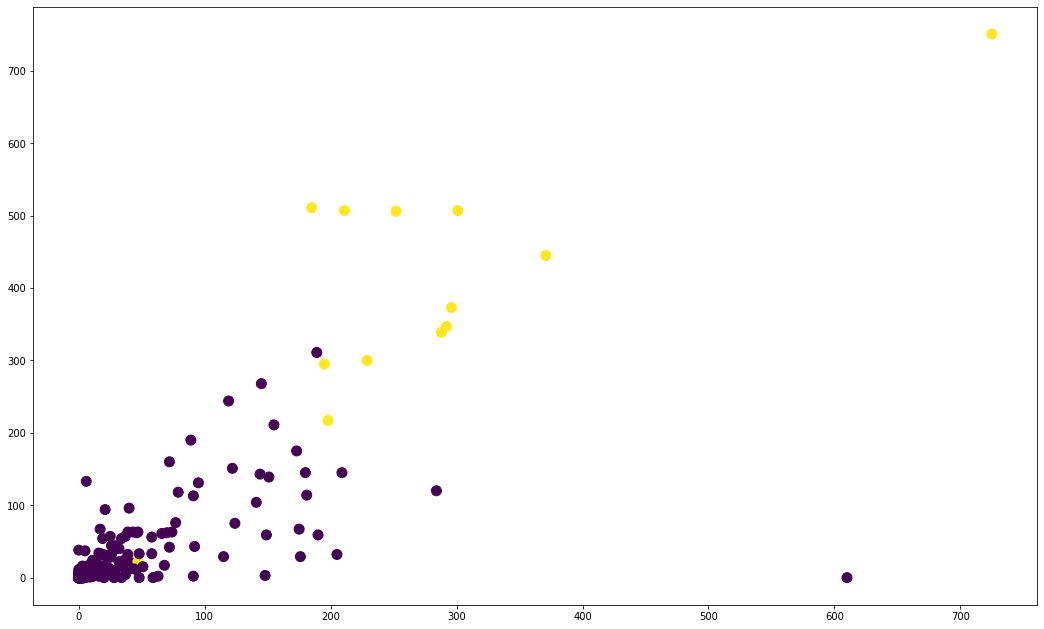

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Ahora parece que tiene algo más de sentido, el clustering. Y los grupos se ven algo más diferenciados.

Vamos a ver si proyectamos de nuevo como queda:

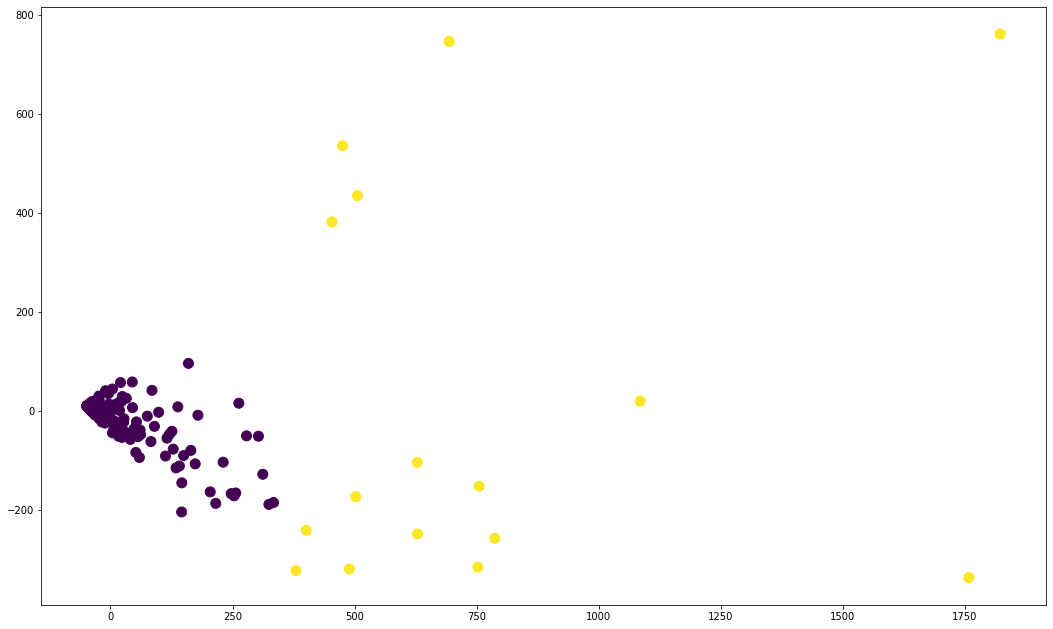

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)

df_pca = pd.DataFrame()

df_pca['1'] = pca_result[:,0]
df_pca['2'] = pca_result[:,1]

kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca['1'], df_pca['2'], c=kmeans.labels_, s=100)
plt.show()

Los resultados parecen más verosímiles. Hay un grupo muy disperso y otro más compacto. Pero parece que podemos diferenciar entre estos grupos.

Aplicamos criterios externos:

In [ ]:
from sklearn import metrics

#Sacado del notebook tema4_02_CriteriosInternos.ipynb
print("Medidas internas para k-means con k=2:")
ss = metrics.silhouette_score(df, y_kmeans, metric='euclidean')
ch = metrics.calinski_harabasz_score(df, y_kmeans)
db = metrics.davies_bouldin_score(df, y_kmeans)

print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

Medidas internas para k-means con k=2:
Coef. de silueta: 0.9109593280282365
Coef. de Calinski-Harabasz: 600.1749615721931
Coef. de Davies-Bouldin: 0.7229357746993088


No salen valores exageradamente buenos, pero tampoco son para nada malos.

## Otros Algoritmos:

Ahora vamos a probar con estos datos un par de algoritmos no se han logrado ver en clase y comprobar qué tal funcionan.

### OPTICS

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


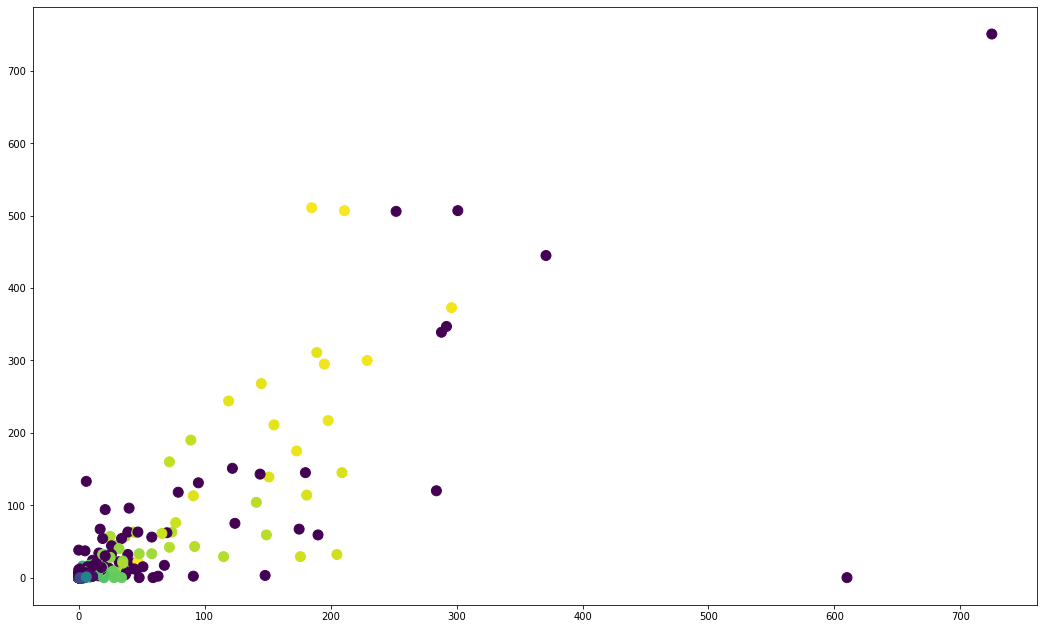

In [ ]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2).fit(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=clustering.labels_, s=100)
plt.show()

Como no podemos ver bien qué grupos crea o si tienen sentido vamos a ir iterar para determinar el mejor valor del hiperparámetro 'min_samples'.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

silu = []
for i in range(2, 30):
  silu.append((metrics.silhouette_score(df, OPTICS(min_samples=i).fit(df).labels_, metric='euclidean'),i))

In [ ]:
print(max(silu))

(0.1170148346574632, 2)


Vemos que ya habíamos escogido el máximo y que es con min_samples = 2. Vamos a proyectar a ver si visualizándolo es más interesante:

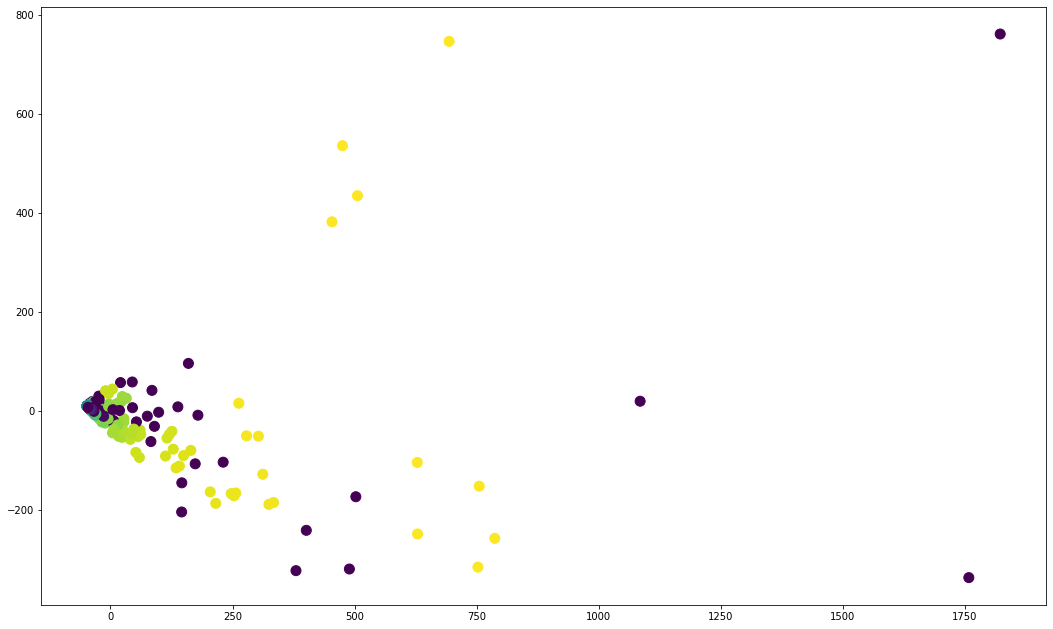

In [ ]:
clustering = OPTICS(min_samples=2).fit(df_pca)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca['1'], df_pca['2'], c=clustering.labels_, s=100)
plt.show()

No parece un buen resultado.

Ahora vamos a explicar como funciona OPTICS y ver un ejemplo en el que funcione muy bien para comprender su funcionamiento.